'Coef'

19835.475169862915

'Intercept'

2355508.101824135

[4339055.618810426, 5330829.377303572, 6322603.135796718]

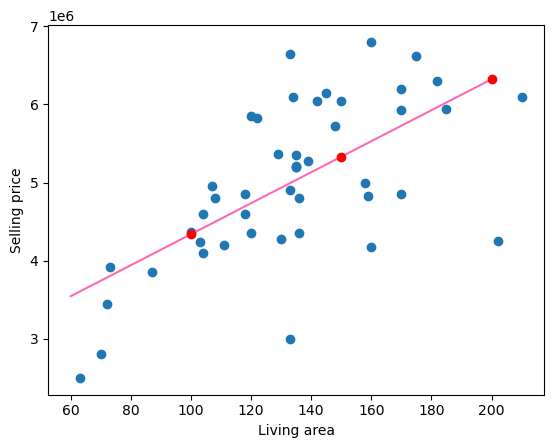

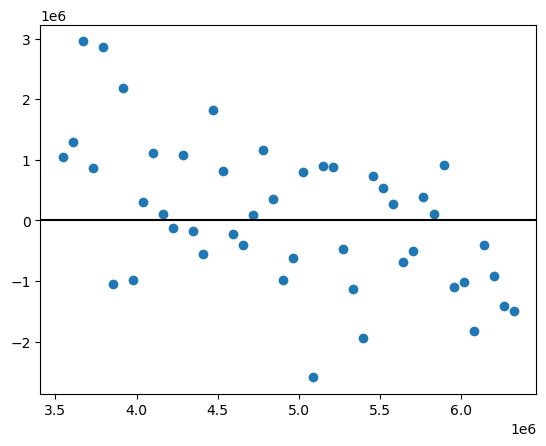

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

hemnet = pd.read_csv("./datasets/data_assignment2.csv")
hemnet = hemnet[hemnet['Land_size'] < 3000] # Only include houses wiht land size less than 3000
hemnet = hemnet[hemnet['Age'] < 70] # Remove houses that is older than 70 years old
plt.scatter(hemnet['Living_area'], hemnet['Selling_price'])

x = list(map(lambda x: [x], hemnet['Living_area']))
y = list(map(lambda x: [x], hemnet['Selling_price']))

model = LinearRegression().fit(x, y) # Preforme linear regression on the data set

xfit = np.linspace(60, 200, len(x))
yfit = model.predict(xfit[:, np.newaxis]) # Use the model to predict a line


display("Coef")
display(model.coef_[0][0])
display("Intercept")
display(model.intercept_[0])


predictions = [] # Use the model to predict x = 100, 150, 200
predictions.append(model.predict([[100]])[0][0])
predictions.append(model.predict([[150]])[0][0])
predictions.append(model.predict([[200]])[0][0])
display(predictions)


plt.plot(xfit, yfit, c="hotpink") # The model
plt.scatter([100,150,200], predictions, c="red", zorder=3) # The predicted values for x = 100, 150, 200
plt.ylabel('Selling price');
plt.xlabel('Living area');
plt.show()


residuals = []
for i, y_test in enumerate(y):
    residuals.append(y_test - yfit[i]) # Get the residual value for each point

plt.scatter(yfit,residuals)
plt.axhline(y=0, xmin=0, xmax=1, c="black")
plt.show()


0.868421052631579

array([[13,  0,  0],
       [ 0, 11,  5],
       [ 0,  0,  9]], dtype=int64)

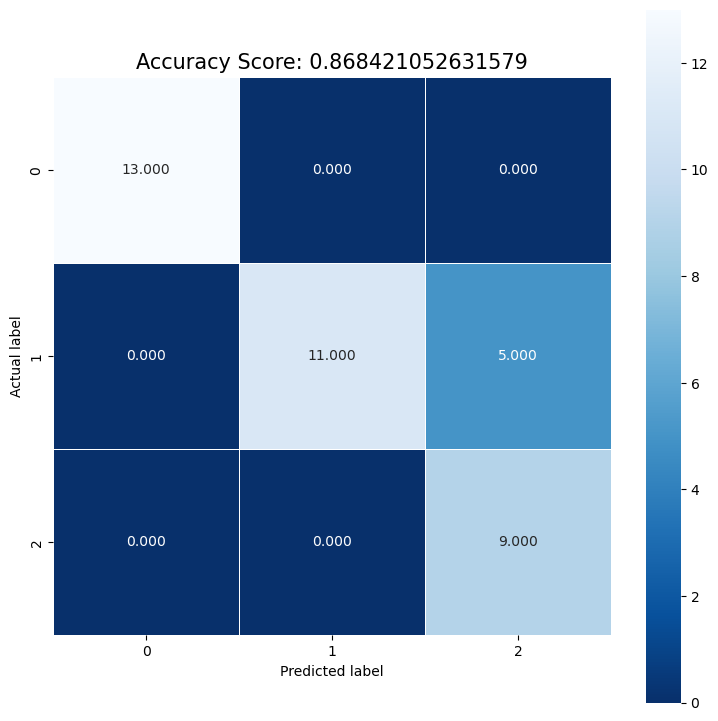

In [2]:
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns 
from sklearn import metrics

iris = load_iris()

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)

logisticRegr = LogisticRegression(multi_class='ovr', solver='liblinear')
logisticRegr.fit(x_train, y_train)
score = logisticRegr.score(x_test, y_test)
display(score)

predictions = logisticRegr.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
display(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

plt.show()

C:\Users\aaron\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[13,  0,  0],
       [ 1,  1, 14],
       [ 0,  0,  9]], dtype=int64)

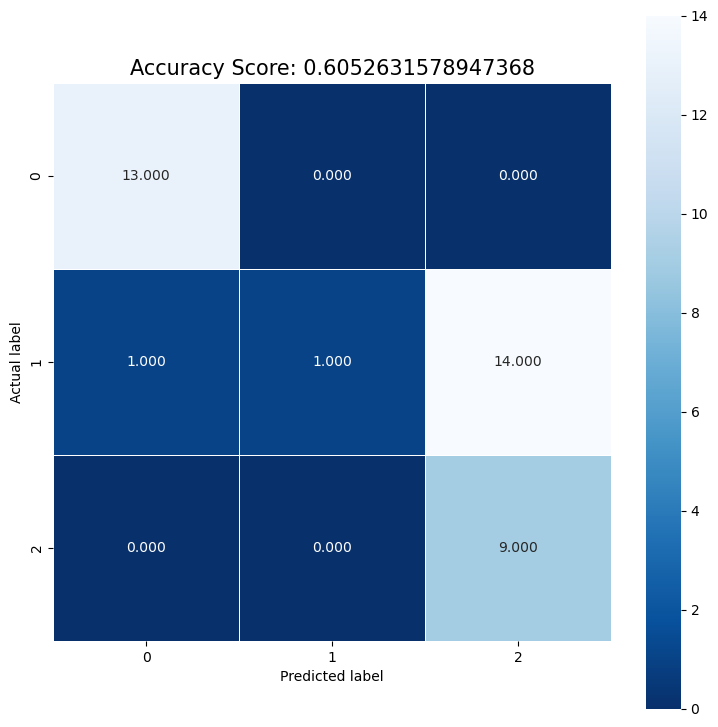

In [11]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(100,101):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    #print(f"Accuracy for kn = {i} is: {metrics.accuracy_score(y_test, y_pred)}")
    cm = metrics.confusion_matrix(y_test, y_pred)
    display(cm)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
    plt.title(all_sample_title, size = 15);
    plt.show()